In [1]:
!pip install keras-tuner==1.4.7
!pip install pandas==2.1.4
!pip install numpy==1.26.4
!pip install tensorflow==2.15.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 53.1 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.2
    Uninstalling pandas-2.2.2:
      Successfully uninstalled pandas-2.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.1.4 which is incompatible.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 53.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 48.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 83.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 33.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow import keras #desde tensorflow 2 se importa keras,  como paquete integrado de tensorflow
import pandas as pd
import numpy as np
from math import sqrt
from numpy import concatenate
from matplotlib import pyplot
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM, GRU
import tensorflow as tf
from datetime import datetime
from keras.models import Sequential
from keras.layers import Dense,Flatten,LSTM,RepeatVector,TimeDistributed#, GRUCellV2
from copy import deepcopy


In [3]:

from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
#Reading the data set, parsing the dates and inferring the date format to date time. We also fill the Nan’s with 0.
#agrego index_col=0 para solucionar Unnamed: 0 porque https://stackoverflow.com/questions/43983622/remove-unnamed-columns-in-pandas-dataframe
dataset = read_csv("/content/drive/MyDrive/a Tesis de Grado/Tesis Versiones/tesis 2024/UA/editorial universitaria/preprocesamiento/outlier/salidaCSV/salidaKNN2024EditorialUniversitariaOctubre.csv", index_col=0)
#dataset.fillna(0, inplace=True)//pasar nans a ceros
#revisar lo que hago en el otro dataset
print(dataset.size)
print(dataset.columns)

print(dataset.shape)
print(dataset)
dataset.head()

67044
Index(['Número de vistas de página', 'Usuarios nuevos', 'Usuarios',
       'Número de sesiones por usuario', 'Sesiones', 'Argentina',
       'Otros Paises', 'mobile', 'desktop', 'tablet',
       'Categoría de dispositivo promedio', 'Categoría de dispositivo std',
       'Windows', 'Android', 'Linux', 'Macintosh',
       'Sistema operativo (not set)', 'iOS', 'Windows Phone', 'Chrome OS',
       'Tizen', 'Sistema operativo promedio', 'Sistema operativo std',
       'Organic Search', 'Social', 'Direct', 'Referral',
       'Agrupación de canales predeterminada promedio',
       'Agrupación de canales predeterminada std', 'mediana_de_medianas',
       'lag_90', 'lag_180', 'lag_270', 'lag_360', 'mediana Dispositivos',
       'mediana Sistema operativo',
       'mediana Agrupación de canales predeterminada'],
      dtype='object')
(1812, 37)
      Número de vistas de página  Usuarios nuevos  Usuarios  \
0                          541.0             22.0      22.0   
1                    

,Número de vistas de página,Usuarios nuevos,Usuarios,Número de sesiones por usuario,Sesiones,Argentina,Otros Paises,mobile,desktop,tablet,...,Agrupación de canales predeterminada promedio,Agrupación de canales predeterminada std,mediana_de_medianas,lag_90,lag_180,lag_270,lag_360,mediana Dispositivos,mediana Sistema operativo,mediana Agrupación de canales predeterminada
0,541.0,22.0,22.0,1.636364,36.0,540.0,1.0,49.0,492.0,0.0,...,135.25,202.460340,89.697167,104.5151,100.866425,99.52464,100.1708,49.0,1.0,28.0
1,226.0,23.0,26.0,1.346154,35.0,212.0,14.0,8.0,211.0,7.0,...,56.50,84.049095,89.697167,104.5151,100.866425,99.52464,100.1708,8.0,0.0,12.5
2,136.0,18.0,24.0,1.458333,35.0,133.0,3.0,17.0,119.0,0.0,...,34.00,39.344630,89.697167,104.5151,100.866425,99.52464,100.1708,17.0,0.0,20.0
3,229.0,11.0,16.0,1.812500,29.0,224.0,5.0,14.0,215.0,0.0,...,57.25,94.035570,89.697167,104.5151,100.866425,99.52464,100.1708,14.0,0.0,4.5
4,60.0,10.0,13.0,1.461538,19.0,56.0,4.0,20.0,40.0,0.0,...,15.00,9.433981,89.697167,104.5151,100.866425,99.52464,100.1708,20.0,0.0,18.0


In [5]:
print(dataset.columns)
print(dataset.shape)
print(dataset.head())

Index(['Número de vistas de página', 'Usuarios nuevos', 'Usuarios',
       'Número de sesiones por usuario', 'Sesiones', 'Argentina',
       'Otros Paises', 'mobile', 'desktop', 'tablet',
       'Categoría de dispositivo promedio', 'Categoría de dispositivo std',
       'Windows', 'Android', 'Linux', 'Macintosh',
       'Sistema operativo (not set)', 'iOS', 'Windows Phone', 'Chrome OS',
       'Tizen', 'Sistema operativo promedio', 'Sistema operativo std',
       'Organic Search', 'Social', 'Direct', 'Referral',
       'Agrupación de canales predeterminada promedio',
       'Agrupación de canales predeterminada std', 'mediana_de_medianas',
       'lag_90', 'lag_180', 'lag_270', 'lag_360', 'mediana Dispositivos',
       'mediana Sistema operativo',
       'mediana Agrupación de canales predeterminada'],
      dtype='object')
(1812, 37)
   Número de vistas de página  Usuarios nuevos  Usuarios  \
0                       541.0             22.0      22.0   
1                       226.0    

In [6]:
#predictor Flag
from copy import deepcopy
from datetime import datetime as dt


In [7]:
#-Habia algo aca en el preprocesamiento anterior

In [8]:
#115*0.75 = 86.25=86
#train_df,test_df = dataset[1:86], dataset[86:]
# parrtir en 80 - 20 segun la profe
# probar sin normalizar los datos, es decir sin escalarlos
#normalizar
#partir datos de entrenamiento y prueba
#dataset.shape[0]=1734 o es 115 en caso del ejemplo
print('dataset.shape[0]',dataset.shape[0],' dataset.shape[1]',dataset.shape[1])
formaFinal=int(dataset.shape[0]*0.80)#80% para train y 20% para test
print(formaFinal)
train_df,test_df = dataset[1:formaFinal], dataset[formaFinal:] #spliteo test/train
train = train_df
test = test_df
# Normalización del conjunto de entrenamiento
train_previo_log1p=deepcopy(train)
for column in train.columns:
    train.loc[:, column] = np.log1p(train[column])
train_previo_zscore = deepcopy(train)
for column in train.columns:
    mean = train[column].mean()  # Media del conjunto de entrenamiento
    std = train[column].std()    # Desviación estándar del conjunto de entrenamiento
    train[column] = (train[column] - mean) / std
    if std != 0:
        train[column] = (train[column] - mean) / std
    else:
        train[column] = 0
test_previo_log1p=deepcopy(test)
for column1 in test.columns:
    test.loc[:, column1] = np.log1p(test[column1])
# Normalización del conjunto de prueba
test_previo_zscore = deepcopy(test)
for column1 in test.columns:
    mean_train = train_previo_zscore[column1].mean()  # Media del conjunto de entrenamiento
    std_train = train_previo_zscore[column1].std()    # Desviación estándar del conjunto de entrenamiento
    if std_train != 0:
        test[column1] = (test[column1] - mean_train) / std_train
    else:
        test[column1] = 0  

print('train_df',train_df.shape)
print('test_df',test_df.shape)
print('test',test.shape,test.values[11])


dataset.shape[0] 1812  dataset.shape[1] 37
1449
train_df (1448, 37)
test_df (363, 37)
test (363, 37) [ 0.28415351  1.1688435   1.02416001 -0.13314932  0.98638305  0.29219525
  0.55355397  0.63233177  0.17913578 -0.31654803  0.27608745  0.03695034
  0.24148466  0.61676554 -0.57537463  0.14709346 -0.26314637  0.7923334
 -0.07800006 -0.13480537  0.          0.24945006  0.16704669  0.21340899
  1.19930762  0.4991939   0.30510696  0.27205578  0.02022211  0.73229229
 -0.46937797 -0.16210613 -0.62924135  0.51988287  0.75262886 -0.42932858
  0.57881099]


<ipython-input-8-f3b70a0d6653>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train[column] = (train[column] - mean) / std
<ipython-input-8-f3b70a0d6653>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train[column] = (train[column] - mean) / std
<ipython-input-8-f3b70a0d6653>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/

In [9]:
#reshape a entrada

def split_series(series, n_past, n_future):
  #
  # n_past ==> no of past observations
  #
  # n_future ==> no of future observations
  #
  X, y = list(), list()
  for window_start in range(len(series)):
    past_end = window_start + n_past
    future_end = past_end + n_future
    if future_end > len(series):
      break
    # slicing the past and future parts of the window
    #past, future = series[window_start:past_end, :], series[past_end:future_end, :]
    #window_start cuando comienza  past_end es cuando termina y future_endes cuando termina las series a comparar, 0 es porque solo va a tomar la primera columna
    #la cual es la de total de vistas
    past, future = series[window_start:past_end, :], series[past_end:future_end, 0]
    X.append(past)
    y.append(future)
  return np.array(X), np.array(y)



"\nn_past = 50 #va a mirar 10 dias al pasado para predecir x dias a futuro\nn_future = 7 #anterior 5 #probar 7 dias a futuro\nn_features = dataset.shape[1] # Columnas totales del dataset\n\n#Now convert both the train and test data into samples using the split_series function.\n\nX_train, y_train = split_series(train.values,n_past, n_future)\nX_train = X_train.reshape((X_train.shape[0], X_train.shape[1],n_features))\n#y_train = y_train.reshape((y_train.shape[0], y_train.shape[1], n_features))\ny_train = y_train.reshape((y_train.shape[0], y_train.shape[1], 1)) #no hace falta reshapear\nX_test, y_test = split_series(test.values,n_past, n_future)\nX_test = X_test.reshape((X_test.shape[0], X_test.shape[1],n_features))\n#y_test = y_test.reshape((y_test.shape[0], y_test.shape[1], n_features))\ny_test = y_test.reshape((y_test.shape[0], y_test.shape[1], 1)) #no hace falta reshapear\nprint('X_train',X_train.shape,X_train)\nprint('y_train',y_train.shape,y_train)\nprint('X_test',X_test.shape,X_te

In [10]:
!pip install keras-tuner -q

In [11]:
!df -h

Filesystem      Size  Used Avail Use% Mounted on
overlay         236G   35G  202G  15% /
tmpfs            64M     0   64M   0% /dev
shm             5.7G     0  5.7G   0% /dev/shm
/dev/root       2.0G  1.2G  820M  59% /usr/sbin/docker-init
tmpfs           6.4G  584K  6.4G   1% /var/colab
/dev/sda1       242G   59G  184G  25% /kaggle/input
tmpfs           6.4G     0  6.4G   0% /proc/acpi
tmpfs           6.4G     0  6.4G   0% /proc/scsi
tmpfs           6.4G     0  6.4G   0% /sys/firmware
drive           100G   58G   43G  58% /content/drive


In [12]:
!cat /proc/cpuinfo

processor	: 0
vendor_id	: GenuineIntel
cpu family	: 6
model		: 85
model name	: Intel(R) Xeon(R) CPU @ 2.00GHz
stepping	: 3
microcode	: 0xffffffff
cpu MHz		: 2000.134
cache size	: 39424 KB
physical id	: 0
siblings	: 2
core id		: 0
cpu cores	: 1
apicid		: 0
initial apicid	: 0
fpu		: yes
fpu_exception	: yes
cpuid level	: 13
wp		: yes
flags		: fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm 3dnowprefetch invpcid_single ssbd ibrs ibpb stibp fsgsbase tsc_adjust bmi1 hle avx2 smep bmi2 erms invpcid rtm mpx avx512f avx512dq rdseed adx smap clflushopt clwb avx512cd avx512bw avx512vl xsaveopt xsavec xgetbv1 xsaves arat md_clear arch_capabilities
bugs		: cpu_meltdown spectre_v1 spectre_v2 spec_store_bypass l1tf mds swapgs taa mmi

In [13]:
!cat /proc/meminfo

MemTotal:       13290460 kB
MemFree:         1290876 kB
MemAvailable:   11486052 kB
Buffers:          536576 kB
Cached:          9573500 kB
SwapCached:            0 kB
Active:          1344372 kB
Inactive:       10000784 kB
Active(anon):       1888 kB
Inactive(anon):  1235588 kB
Active(file):    1342484 kB
Inactive(file):  8765196 kB
Unevictable:          20 kB
Mlocked:              20 kB
SwapTotal:             0 kB
SwapFree:              0 kB
Dirty:               552 kB
Writeback:             0 kB
AnonPages:       1235284 kB
Mapped:           726104 kB
Shmem:              2224 kB
KReclaimable:     412900 kB
Slab:             488144 kB
SReclaimable:     412900 kB
SUnreclaim:        75244 kB
KernelStack:        7724 kB
PageTables:        22600 kB
SecPageTables:         0 kB
NFS_Unstable:          0 kB
Bounce:                0 kB
WritebackTmp:          0 kB
CommitLimit:     6645228 kB
Committed_AS:    3977828 kB
VmallocTotal:   34359738367 kB
VmallocUsed:       81884 kB
VmallocChunk:    

In [14]:
!/usr/local/cuda/bin/nvcc --version



nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2023 NVIDIA Corporation
Built on Tue_Aug_15_22:02:13_PDT_2023
Cuda compilation tools, release 12.2, V12.2.140
Build cuda_12.2.r12.2/compiler.33191640_0


In [15]:
!which nvidia-smi

/opt/bin/nvidia-smi


In [16]:
!nvidia-smi

Thu Oct 24 21:09:20 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   41C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [17]:
!python --version

Python 3.10.12


In [18]:
import keras_tuner as kt
import datetime
from datetime import timedelta
from pytz import timezone
import tensorflow.keras.backend as K
import datetime
from datetime import timedelta
from pytz import timezone
print(tf. __version__)
print(pd. __version__)
print(np. __version__)
print(kt. __version__)

2.15.0
2.1.4
1.26.4
1.4.7


In [19]:
# Establecer la semilla
seed_value = 42
import random
# Establecer semillas
np.random.seed(seed_value)
random.seed(seed_value)
tf.random.set_seed(seed_value)
from tensorflow.keras.saving import register_keras_serializable

In [20]:
print('std',train_previo_zscore['Número de vistas de página'].std())
print('mean',train_previo_zscore['Número de vistas de página'].mean() )

std 0.8649864124052458
mean 4.308087962814851


In [21]:
media_train=train_previo_zscore['Número de vistas de página'].std()
std_train=train_previo_zscore['Número de vistas de página'].mean()
#esta metrica esta en el codigo de github del ganador
@register_keras_serializable()
def smape_loss(y_true, y_pred):
    #revierto zscore
    global media_train
    global std_train
    y_true=(y_true*std_train)+media_train
    y_pred=(y_pred*std_train)+media_train
    #revierto log1p
    y_true=tf.math.expm1(y_true)
    y_pred=tf.math.expm1(y_pred)
    epsilon = 0.1
    y_pred = tf.convert_to_tensor(y_pred)
    y_true = tf.cast(y_true, y_pred.dtype)
    # Calcular el denominador de SMAPE
    summ = tf.maximum(tf.abs(y_true) + tf.abs(y_pred) + epsilon, 0.5 + epsilon)

    # Calcular SMAPE
    smape = tf.abs(y_pred - y_true) / summ * 2.0

    # Retornar la media de SMAPE
    return K.mean(smape, axis=-1)

@register_keras_serializable()
def mae_denorm(y_true, y_pred):
    #revierto zscore
    global media_train
    global std_train
    y_true1=(y_true*std_train)+media_train
    y_pred1=(y_pred*std_train)+media_train
    #revierto log1p
    y_true2=tf.math.expm1(y_true1)
    y_pred2=tf.math.expm1(y_pred1)

    return tf.keras.losses.mean_absolute_error(y_true2, y_pred2)

In [22]:
pathModelosJsonMejor="/content/drive/MyDrive/a Tesis de Grado/Tesis Versiones/tesis 2024/UA/editorial universitaria/modelos/modelos resultados/prueba 500 epocas 1 capas sin early stopping"
nombreMejorModeloMejor="/hyperband500-3.221866-ndays60_500epochs1capa.h5"#el mejor modelo es el hyperband de 28 dias y 107 época

reconstructed_model2 = tf.keras.models.load_model(pathModelosJsonMejor+nombreMejorModeloMejor,custom_objects={'smape_loss':smape_loss,'mae_denorm':mae_denorm})

In [23]:
from tensorflow.keras.callbacks import TensorBoard

In [24]:

pathModelosJson="/content/drive/MyDrive/a Tesis de Grado/Tesis Versiones/tesis 2024/UA/editorial universitaria/modelos/modelos resultados/prueba2 1000 epocas 1 capas sin early stopping"
nombreMejorModelo="ndays60_1000epochs1capa.h5"
class PrintTimeCallback(tf.keras.callbacks.Callback):#https://www.tensorflow.org/guide/keras/writing_your_own_callbacks
    def on_epoch_end(self, epoch, logs=None):
        cambio=datetime.datetime.now(timezone('UTC')) - timedelta(hours=3)
        salida=f"{cambio:%Y-%m-%d %H:%M:%S }"
        print('Tiempo on_epoch_end',salida)
n_past=60
cambio=datetime.datetime.now(timezone('UTC')) - timedelta(hours=3)
tiempoFinal=f"{cambio:%Y-%m-%d %H:%M:%S }"
print('Tiempo  Inicio y n_past',tiempoFinal , ' n_past:-->',n_past)
n_future = 60
n_features = train.shape[1]
X_train, y_train = split_series(train.values,n_past, n_future)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1],n_features))
y_train = y_train.reshape((y_train.shape[0], y_train.shape[1], 1)) #no hace falta reshapear
X_test, y_test = split_series(test.values,n_past, n_future)
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1],n_features))
y_test = y_test.reshape((y_test.shape[0], y_test.shape[1], 1)) #no hace falta reshapear
logpaht=pathModelosJson+f"/logsndays60_1000epochs1capa"
from tensorflow.keras.callbacks import ReduceLROnPlateau
#reduce_lr = ReduceLROnPlateau(monitor='val_smape_loss_zscore', factor=0.5, patience=5, min_lr=1e-50)
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=50)#https://pub.towardsai.net/keras-earlystopping-callback-to-train-the-neural-networks-perfectly-2a3f865148f7
mcp_save = tf.keras.callbacks.ModelCheckpoint(pathModelosJson+"/"+'hyperband{epoch:03d}-{val_loss:03f}-'+nombreMejorModelo, save_best_only=True, monitor='val_loss', mode='min')#https://stackoverflow.com/questions/48285129/saving-best-model-in-keras
history_modelo=reconstructed_model2.fit(X_train,y_train,epochs=1000,validation_data=(X_test,y_test),batch_size=64,verbose=1,
                                        callbacks=[PrintTimeCallback(),
                                                   mcp_save,#reduce_lr,
                                                   TensorBoard(log_dir=logpaht, write_graph=False, profile_batch=0)
                                                   ])
cambio=datetime.datetime.now(timezone('UTC')) - timedelta(hours=3)
tiempoFinalDespues=f"{cambio:%Y-%m-%d %H:%M:%S }"
print('Tiempo Final y n_past',tiempoFinalDespues , ' n_past:-->',n_past)
#reentreno 70-30

Tiempo  Inicio y n_past 2024-10-24 18:10:48   n_past:--> 60
Epoch 1/1000
21/21 [==============================] - 8s 123ms/step - loss: 0.5981 - smape_loss: 7.5854e-07 - mae_denorm: 7.9642e-07 - val_loss: 3.2254 - val_smape_loss: 1.8573 - val_mae_denorm: 460754176.0000
Epoch 2/1000
 1/21 [>.............................] - ETA: 0s - loss: 0.6077 - smape_loss: 7.8679e-07 - mae_denorm: 8.2608e-07

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


21/21 [==============================] - 1s 32ms/step - loss: 0.5927 - smape_loss: 7.5891e-07 - mae_denorm: 7.9681e-07 - val_loss: 3.1563 - val_smape_loss: 1.8553 - val_mae_denorm: 361066176.0000
Epoch 3/1000
21/21 [==============================] - 0s 22ms/step - loss: 0.5951 - smape_loss: 7.6018e-07 - mae_denorm: 7.9814e-07 - val_loss: 3.2595 - val_smape_loss: 1.8615 - val_mae_denorm: 691735552.0000
Epoch 4/1000
21/21 [==============================] - 0s 22ms/step - loss: 0.5898 - smape_loss: 7.6025e-07 - mae_denorm: 7.9821e-07 - val_loss: 3.2472 - val_smape_loss: 1.8591 - val_mae_denorm: 624498752.0000
Epoch 5/1000
21/21 [==============================] - 0s 22ms/step - loss: 0.5903 - smape_loss: 7.5841e-07 - mae_denorm: 7.9629e-07 - val_loss: 3.2511 - val_smape_loss: 1.8573 - val_mae_denorm: 663490432.0000
Epoch 6/1000
21/21 [==============================] - 0s 22ms/step - loss: 0.5834 - smape_loss: 7.5766e-07 - mae_denorm: 7.9549e-07 - val_loss: 3.2087 - val_smape_loss: 1.8542 -

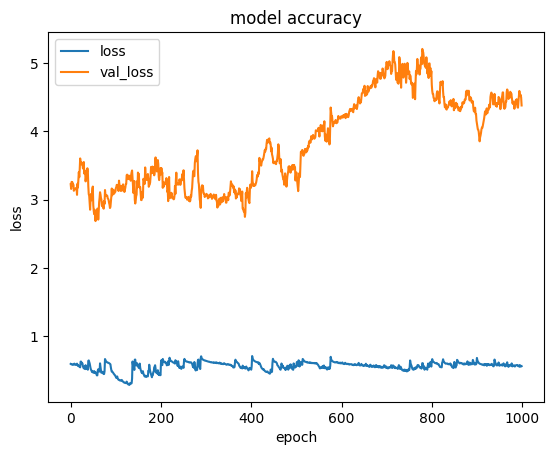

best_score 2.6862387657165527


In [26]:
from matplotlib import pyplot as plt
plt.plot(history_modelo.history['loss'])
plt.plot(history_modelo.history['val_loss'])
#plt.plot(history_modelo.history['val_smape_loss_zscore'])
plt.title('model accuracy')
plt.ylabel('loss')
plt.xlabel('epoch')
#plt.legend(['loss', 'val_loss','val_smape_loss_zscore'], loc='upper left')
plt.legend(['loss', 'val_loss'], loc='upper left')
plt.show()
best_score=min(history_modelo.history['val_loss'])
print('best_score',best_score)
#best_score_smape=min(history_modelo.history['val_smape_loss_zscore'])
#print('best_score smape',best_score_smape)

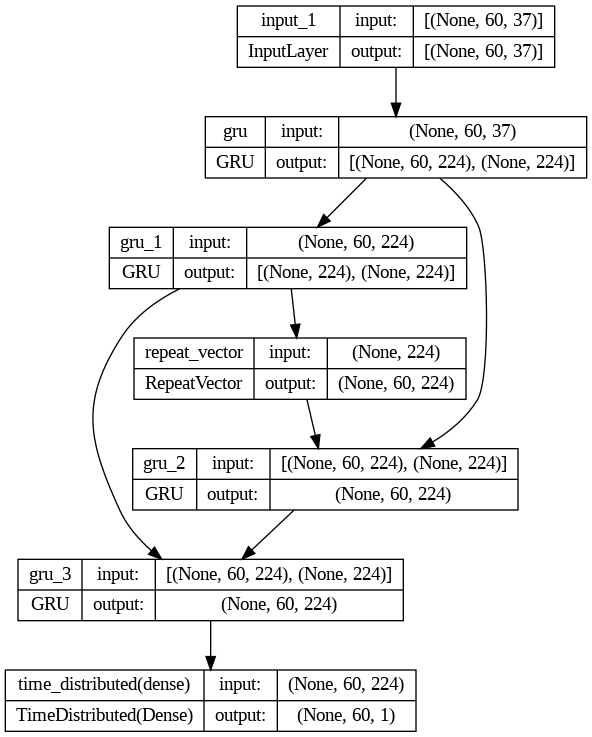

In [27]:
from keras.utils import plot_model

fileplot=pathModelosJson
plot_model(reconstructed_model2, to_file=fileplot+'/model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
%load_ext tensorboard

%tensorboard --logdir "/content/drive/MyDrive/a Tesis de Grado/Tesis Versiones/tesis2023/Google Analytics 4/Tum Transmedia/modelos/modelos guardados/prueba1-30porciento/logs10divNday21DiasAtras"

In [ ]:
from tensorflow.keras.saving import register_keras_serializable
media_train=train_previo_zscore['Número de vistas de página'].std()
std_train=train_previo_zscore['Número de vistas de página'].mean()
#esta metrica esta en el codigo de github del ganador
@register_keras_serializable()
def smape_loss(y_true, y_pred):
    #revierto zscore
    global media_train
    global std_train
    y_true=(y_true*std_train)+media_train
    y_pred=(y_pred*std_train)+media_train
    #revierto log1p
    y_true=tf.math.expm1(y_true)
    y_pred=tf.math.expm1(y_pred)
    epsilon = 0.1
    y_pred = tf.convert_to_tensor(y_pred)
    y_true = tf.cast(y_true, y_pred.dtype)
    # Calcular el denominador de SMAPE
    summ = tf.maximum(tf.abs(y_true) + tf.abs(y_pred) + epsilon, 0.5 + epsilon)

    # Calcular SMAPE
    smape = tf.abs(y_pred - y_true) / summ * 2.0

    # Retornar la media de SMAPE
    return K.mean(smape, axis=-1)

@register_keras_serializable()
def mae_denorm(y_true, y_pred):
    #revierto zscore
    global media_train
    global std_train
    y_true1=(y_true*std_train)+media_train
    y_pred1=(y_pred*std_train)+media_train
    #revierto log1p
    y_true2=tf.math.expm1(y_true1)
    y_pred2=tf.math.expm1(y_pred1)

    return tf.keras.losses.mean_absolute_error(y_true2, y_pred2)

In [28]:
#el mejor modelo de verdad
#pathModelosJsonMejor="/content/drive/MyDrive/a Tesis de Grado/Tesis Versiones/tesis 2024/UA/tum transmedia/modelos/modelos resultados/mejores modelos guardados/modelo"
#nombreMejorModeloMejor="/ ndays60hyperband mae 60 zscore.h5"#el mejor modelo es el hyperband de 28 dias y 107 época
pathModelosJsonMejor="/content/drive/MyDrive/a Tesis de Grado/Tesis Versiones/tesis 2024/UA/editorial universitaria/modelos/modelos resultados/prueba2 1000 epocas 1 capas sin early stopping"
nombreMejorModeloMejor="/hyperband056-2.686239-ndays60_1000epochs1capa.h5"#el mejor modelo es el hyperband de 28 dias y 107 época
n_past=60
cambio=datetime.datetime.now(timezone('UTC')) - timedelta(hours=3)
tiempoFinal=f"{cambio:%Y-%m-%d %H:%M:%S }"
print('Tiempo  Inicio y n_past',tiempoFinal , ' n_past:-->',n_past)
n_future = 60
n_features = train.shape[1]
X_train, y_train = split_series(train.values,n_past, n_future)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1],n_features))
y_train = y_train.reshape((y_train.shape[0], y_train.shape[1], 1)) #no hace falta reshapear
X_test, y_test = split_series(test.values,n_past, n_future)
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1],n_features))
y_test = y_test.reshape((y_test.shape[0], y_test.shape[1], 1)) #no hace falta reshapear

reconstructed_model3 = tf.keras.models.load_model(pathModelosJsonMejor+nombreMejorModeloMejor,custom_objects={'smape_loss':smape_loss,'mae_denorm':mae_denorm})

Tiempo  Inicio y n_past 2024-10-24 18:31:06   n_past:--> 60


In [29]:
print("Evaluate on test data")
results = reconstructed_model3.evaluate(X_test,y_test, batch_size=64)
print("test loss", results)

Evaluate on test data
4/4 [==============================] - 1s 17ms/step - loss: 2.6862 - smape_loss: 1.7318 - mae_denorm: 5208184832.0000
test loss [2.6862387657165527, 1.7317631244659424, 5208184832.0]


In [ ]:
pred_e1d1=reconstructed_model3.predict(X_test)
pred_e1d1=deepcopy(pred_e1d1)
reshapePred=pred_e1d1.reshape((pred_e1d1.shape[0]*pred_e1d1.shape[2]),pred_e1d1.shape[1])
reshapeY_test=y_test.reshape((y_test.shape[0]*y_test.shape[2]),y_test.shape[1])
print(pred_e1d1.shape,reshapePred.shape)
print('y_test',y_test.shape,reshapeY_test.shape)
print(pred_e1d1)

8/8 [==============================] - 0s 8ms/step
(228, 60, 1) (228, 60)
y_test (228, 60, 1) (228, 60)
[[[ 0.13405733]
  [-0.10485971]
  [-0.11587724]
  ...
  [ 0.12007535]
  [ 0.12170792]
  [ 0.12329084]]

 [[ 0.05874036]
  [-0.20824885]
  [-0.19488086]
  ...
  [ 0.1336513 ]
  [ 0.13586427]
  [ 0.1380217 ]]

 [[ 0.01915782]
  [ 0.07128946]
  [ 0.02053672]
  ...
  [ 0.3408648 ]
  [ 0.34353903]
  [ 0.34610948]]

 ...

 [[-0.22857368]
  [-0.27693883]
  [-0.24053316]
  ...
  [ 0.33198687]
  [ 0.33512256]
  [ 0.33816913]]

 [[-0.21391219]
  [-0.2130254 ]
  [-0.21878019]
  ...
  [ 0.34497365]
  [ 0.3474636 ]
  [ 0.34985176]]

 [[ 0.14883399]
  [-0.07219452]
  [-0.05569784]
  ...
  [ 0.18183394]
  [ 0.18258534]
  [ 0.18330087]]]


In [ ]:
print(np.expm1(y_test))

[[[ 34.]
  [  6.]
  [  4.]
  ...
  [ 56.]
  [ 34.]
  [ 15.]]

 [[  6.]
  [  4.]
  [ 13.]
  ...
  [ 34.]
  [ 15.]
  [ 16.]]

 [[  4.]
  [ 13.]
  [ 94.]
  ...
  [ 15.]
  [ 16.]
  [  9.]]

 ...

 [[ 20.]
  [100.]
  [ 25.]
  ...
  [  9.]
  [ 50.]
  [ 62.]]

 [[100.]
  [ 25.]
  [ 17.]
  ...
  [ 50.]
  [ 62.]
  [ 34.]]

 [[ 25.]
  [ 17.]
  [ 29.]
  ...
  [ 62.]
  [ 34.]
  [ 81.]]]


In [ ]:
formaFinal=int(dataset.shape[0]*0.80)#80% para train y 20% para test
print(formaFinal)
dataset2=test_previo_log1p
train_df,test_df = dataset2[1:formaFinal], dataset[formaFinal:] #spliteo test/train
for column1 in dataset2.columns:
    std=test[column1].std()
    if std != 0:
        test[column] = (test[column] - test[column].mean()) / std
    else:
        # Si std es 0, puedes optar por no normalizar o asignar un valor específico
        test[column] = 0  # O algún otro valor neutral que prefieras
test_df=test

1385


<ipython-input-149-0fce25b5c094>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test[column] = (test[column] - test[column].mean()) / std
<ipython-input-149-0fce25b5c094>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test[column] = 0  # O algún otro valor neutral que prefieras


In [ ]:
X_test, y_test2 = split_series(test_df.values,n_past, n_future)
y_test2

array([[3.55534806, 1.94591015, 1.60943791, ..., 4.04305127, 3.55534806,
        2.77258872],
       [1.94591015, 1.60943791, 2.63905733, ..., 3.55534806, 2.77258872,
        2.83321334],
       [1.60943791, 2.63905733, 4.55387689, ..., 2.77258872, 2.83321334,
        2.30258509],
       ...,
       [3.04452244, 4.61512052, 3.25809654, ..., 2.30258509, 3.93182563,
        4.14313473],
       [4.61512052, 3.25809654, 2.89037176, ..., 3.93182563, 4.14313473,
        3.55534806],
       [3.25809654, 2.89037176, 3.40119738, ..., 4.14313473, 3.55534806,
        4.40671925]])

In [ ]:
print(reconstructed_model2.predict(X_test))

8/8 [==============================] - 0s 14ms/step
[[[-0.00989227]
  [-0.30038208]
  [-0.30038208]
  ...
  [-0.30038208]
  [-0.30038208]
  [-0.30038208]]

 [[-0.45747334]
  [-0.31219292]
  [-0.31219286]
  ...
  [-0.31219286]
  [-0.31219286]
  [-0.31219286]]

 [[-0.3140918 ]
  [-0.33975315]
  [-0.33975315]
  ...
  [-0.3397531 ]
  [-0.3397531 ]
  [-0.3397531 ]]

 ...

 [[-0.49435169]
  [-0.23936537]
  [-0.23936537]
  ...
  [-0.23936556]
  [-0.23936556]
  [-0.23936555]]

 [[-0.4357564 ]
  [-0.21697423]
  [-0.21697421]
  ...
  [-0.21697387]
  [-0.2169738 ]
  [-0.21697384]]

 [[-0.02893209]
  [-0.25230914]
  [-0.25230914]
  ...
  [-0.25230914]
  [-0.25230914]
  [-0.25230914]]]


In [ ]:
print('MEAN',train_previo_zscore['Número de vistas de página'].mean())
print('STD',train_previo_zscore['Número de vistas de página'].std())

MEAN 34.23988439306358
STD 46.969185436927425


In [30]:
pred_e1d1=reconstructed_model3.predict(X_test, batch_size=64)
pred_e1d1=deepcopy(pred_e1d1)
reshapePred=pred_e1d1.reshape((pred_e1d1.shape[0]*pred_e1d1.shape[2]),pred_e1d1.shape[1])
reshapeY_test=y_test.reshape((y_test.shape[0]*y_test.shape[2]),y_test.shape[1])
print(pred_e1d1.shape,reshapePred.shape)
print('y_test',y_test.shape,reshapeY_test.shape)
def smape2(a, f):
    print('len(a)',len(a))

    #std=train_previo_zscore['Predictor Flag'].std()
    #media=train_previo_zscore['Predictor Flag'].mean()
    std=train_previo_zscore['Número de vistas de página'].std()
    media=train_previo_zscore['Número de vistas de página'].mean()
    #revierto zscore
    a=(a*std)+media
    f=(f*std)+media

    a=np.round(np.expm1(a))
    f=np.round(np.expm1(f))
    print('a',a)
    print('f',f)
    return (1/len(a) * np.sum(2 * np.abs(f-a) / (np.abs(a) + np.abs(f))) )

def mae_manual(a, f):
    print('len(a)', len(a))

    # Obtener la desviación estándar y media
    std = train_previo_zscore['Número de vistas de página'].std()
    media = train_previo_zscore['Número de vistas de página'].mean()

    # Revertir z-score
    a = (a * std) + media
    f = (f * std) + media

    a=np.round(np.expm1(a))
    f=np.round(np.expm1(f))
    print('a mae',a)
    print('f mae',f)

    epsilon = 0.1  # Valor para evitar divisiones por cero
    diff =np.abs(a-f)
    return np.mean(diff)#(1 / len(a)) * np.sum(diff)

def rmse_manual(a, f):
    print('len(a)', len(a))

    # Obtener la desviación estándar y media
    std = train_previo_zscore['Número de vistas de página'].std()
    media = train_previo_zscore['Número de vistas de página'].mean()

    # Revertir z-score
    a = (a * std) + media
    f = (f * std) + media

    a=np.round(np.expm1(a))
    f=np.round(np.expm1(f))

    # Calcular el RMSE (Error Cuadrático Medio)
    diff = np.square(a - f)  # Cuadrado de la diferencia
    mse = np.mean(diff)  # Error Cuadrático Medio
    rmse_calculado = np.sqrt(mse)  # Raíz cuadrada del MSE

    return rmse_calculado

auxpred=reshapePred.reshape((y_test.shape[0]*y_test.shape[1]),1)
auxpred2=auxpred.reshape((auxpred.shape[0]),)
auxY_test=reshapeY_test.reshape((y_test.shape[0]*y_test.shape[1]),1)
print(auxpred.shape)
print('smape',smape2(auxY_test,auxpred))
print('mae',mae_manual(auxY_test,auxpred))
print('rmse',rmse_manual(auxY_test,auxpred))
print(auxpred2.shape)
print(np.array([1,2,3]).shape)
print(auxpred2)

4/4 [==============================] - 1s 13ms/step
(244, 60, 1) (244, 60)
y_test (244, 60, 1) (244, 60)
(14640, 1)
len(a) 14640
a [[ 28.]
 [ 54.]
 [157.]
 ...
 [ 88.]
 [103.]
 [148.]]
f [[ 160.]
 [ 297.]
 [ 355.]
 ...
 [1356.]
 [1367.]
 [1378.]]
smape 1.3832376102208916
len(a) 14640
a mae [[ 28.]
 [ 54.]
 [157.]
 ...
 [ 88.]
 [103.]
 [148.]]
f mae [[ 160.]
 [ 297.]
 [ 355.]
 ...
 [1356.]
 [1367.]
 [1378.]]
mae 708.8170765027322
len(a) 14640
rmse 1641.6532904228848
(14640,)
(3,)
[0.8975979 1.6067113 1.8129697 ... 3.3585365 3.3677824 3.3768513]


In [31]:
test_previo_log1p['Número de vistas de página']
X_test5, y_test5 = split_series(test_previo_log1p.values,n_past, n_future)
y_test5

array([[ 28.,  54., 157., ...,  17.,  58.,  61.],
       [ 54., 157., 265., ...,  58.,  61.,  58.],
       [157., 265., 202., ...,  61.,  58.,  28.],
       ...,
       [ 80.,  63.,  82., ...,  46.,  58.,  88.],
       [ 63.,  82., 188., ...,  58.,  88., 103.],
       [ 82., 188., 202., ...,  88., 103., 148.]])

In [32]:
y_test5.shape

(244, 60)

In [33]:
auxY_test.shape

(14640, 1)

len(a) 14640
[[28.]]


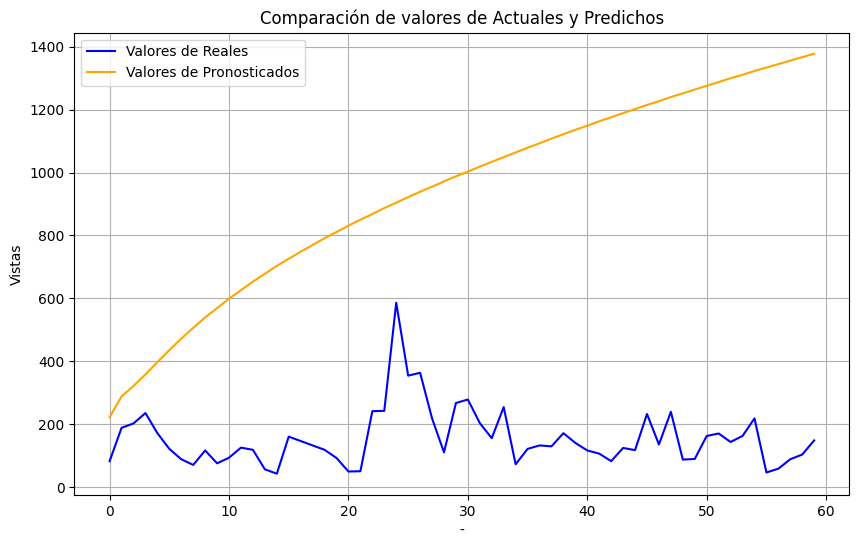

In [34]:
# Obtener la desviación estándar y media
import matplotlib.pyplot as plt
std = train_previo_zscore['Número de vistas de página'].std()
media = train_previo_zscore['Número de vistas de página'].mean()

# Revertir z-score
#denorm_actually=(auxY_test*std)+media
#denorm_forecast=(auxpred*std)+media

#denorm_actually = np.array(denorm_actually)
#denorm_forecast = np.array(denorm_forecast)
def denorm_manual(a, f):
    print('len(a)', len(a))

    # Obtener la desviación estándar y media
    std = train_previo_zscore['Número de vistas de página'].std()
    media = train_previo_zscore['Número de vistas de página'].mean()

    # Revertir z-score
    a = (a * std) + media
    f = (f * std) + media

    a=np.round(np.expm1(a))
    f=np.round(np.expm1(f))

    return a,f
denorm_actually,denorm_forecast=  denorm_manual(auxY_test,auxpred)
# Crear un rango de índices para el eje x
x = np.arange(len(denorm_actually))

# Crear el plot
plt.figure(figsize=(10, 6))
#ultimos 60
plt.plot( denorm_actually[-60:], label='Valores de Reales', color='blue')
plt.plot( denorm_forecast[-60:], label='Valores de Pronosticados', color='orange')
#primeros 60
#plt.plot(np.arange(len(denorm_actually[:90])) ,denorm_actually[:90], label='Valores de Reales', color='blue')
#plt.plot(np.arange(len(denorm_actually[:90])) ,denorm_forecast[:90], label='Valores de Pronosticados', color='orange')
print(denorm_actually[:1])
plt.title('Comparación de valores de Actuales y Predichos')
plt.xlabel('-')
plt.ylabel('Vistas')
plt.legend()
plt.grid()
plt.show()

In [ ]:
mae_manual(auxY_test[:64],auxpred[:64])

len(a) 64
a mae [[ 34.]
 [  6.]
 [  4.]
 [ 13.]
 [ 94.]
 [ 33.]
 [ 37.]
 [ 24.]
 [ 14.]
 [  6.]
 [ 20.]
 [ 14.]
 [109.]
 [ 46.]
 [ 28.]
 [ 29.]
 [ 25.]
 [ 49.]
 [ 96.]
 [ 21.]
 [ 18.]
 [ 33.]
 [ 25.]
 [  7.]
 [ 27.]
 [ 46.]
 [ 45.]
 [ 72.]
 [ 26.]
 [ 34.]
 [  8.]
 [ 12.]
 [ 39.]
 [ 20.]
 [ 72.]
 [ 22.]
 [ 18.]
 [  5.]
 [ 34.]
 [ 37.]
 [ 58.]
 [  8.]
 [  6.]
 [  4.]
 [ 17.]
 [ 45.]
 [ 15.]
 [ 64.]
 [ 54.]
 [ 41.]
 [  5.]
 [  8.]
 [ 31.]
 [ 33.]
 [ 61.]
 [ 13.]
 [  9.]
 [ 56.]
 [ 34.]
 [ 15.]
 [  6.]
 [  4.]
 [ 13.]
 [ 94.]]
f mae [[26.]
 [22.]
 [19.]
 [21.]
 [23.]
 [45.]
 [31.]
 [40.]
 [37.]
 [34.]
 [33.]
 [31.]
 [35.]
 [36.]
 [40.]
 [39.]
 [36.]
 [34.]
 [32.]
 [33.]
 [37.]
 [38.]
 [36.]
 [33.]
 [31.]
 [31.]
 [33.]
 [37.]
 [37.]
 [34.]
 [32.]
 [30.]
 [31.]
 [34.]
 [36.]
 [34.]
 [32.]
 [31.]
 [30.]
 [32.]
 [34.]
 [34.]
 [32.]
 [31.]
 [31.]
 [31.]
 [33.]
 [34.]
 [33.]
 [32.]
 [31.]
 [31.]
 [32.]
 [33.]
 [33.]
 [32.]
 [32.]
 [31.]
 [32.]
 [33.]
 [25.]
 [20.]
 [23.]
 [22.]]


19.234375